# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [44]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [45]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head(2)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [46]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/Julio/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



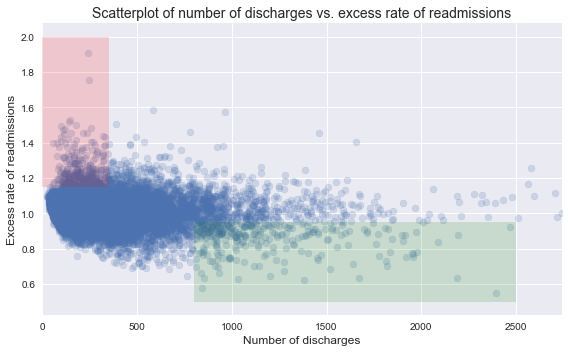

In [47]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

### A. Do you agree with the above analysis and recommendations? Why or why not?
### No. Please see critique_of_initial_analysis.md

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
### Note: According to the info, three of the variables are correlated because:
### - Excess readmission ratio = risk-adjusted predicted readmissions/risk-adjusted expected readmissions
### - Thus I will only use Discharges, Excess Readmission Ratio, and Readmissions in the analysis

# Repeat initial exploratory analysis.   
# Predictor = Discharges , Outcome = Excess Ratio

In [48]:
# LOAD MY FUNCTIONS
%run 11_Readmission.py
# load and clean data
df = load_and_clean()
df.head(3)

,Discharges,Excess_Ratio,Readmissions,State
0,242.0,1.9095,38.0,WI
1,247.0,1.7521,33.0,DC
2,586.0,1.5836,53.0,SC


# Conclusions:
## 1. Discharges explains only about 57% of the variation in the excess ratio if the raw data is used
## 2. Take it with a grain of salt, no cross-validation was performed
## 3. Taking a log10 of the discharge data makes a huge difference, the Adj. R-squared increases to ~0.97

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.570     
Dependent Variable: y                AIC:                23191.5473
Date:               2017-03-20 16:17 BIC:                23198.8972
No. Observations:   11497            Log-Likelihood:     -11595.   
Df Model:           1                F-statistic:        1.524e+04 
Df Residuals:       11496            Prob (F-statistic): 0.00      
R-squared:          0.570            Scale:              0.44009   
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1        0.0016      0.0000    123.4618    0.0000    0.0016    0.0016
-------------------------------------------------------------------
Omnibus:            8121.023      Durbin-Watson:         1.053     
Prob(Omnibus):      0.000         Jarque-Bera (JB):   

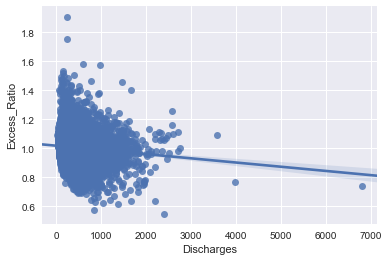

In [50]:
# raw data
linear_fitting(df.copy(),'Discharges','Excess_Ratio')

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.971     
Dependent Variable: y                AIC:                -7891.5325
Date:               2017-03-20 16:17 BIC:                -7884.1826
No. Observations:   11497            Log-Likelihood:     3946.8    
Df Model:           1                F-statistic:        3.878e+05 
Df Residuals:       11496            Prob (F-statistic): 0.00      
R-squared:          0.971            Scale:              0.029471  
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1        0.4052      0.0007    622.7342    0.0000    0.4039    0.4064
-------------------------------------------------------------------
Omnibus:              73.204        Durbin-Watson:           1.177 
Prob(Omnibus):        0.000         Jarque-Bera (JB): 

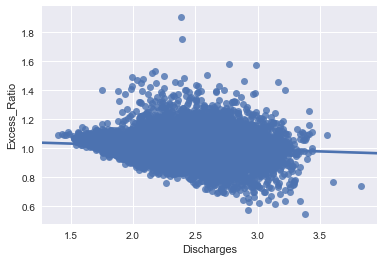

In [51]:
# Log
df_log10 = transform_data(df.copy(),['Discharges','Readmissions'],np.log10)
linear_fitting(df_log10,'Discharges','Excess_Ratio')
# I used df.copy() to avoid changing the original data

# New  analysis.   
# 2. Answer the following questions:
#   1. Are other continous variables correlated?

# - Yes. The discharges are positively correlated with readmissions (R2=0.98), and it clusters in two groups:
# - A good quality group with large discharges and low readmissions
# - A low quality group with large readmissions and low discharges

#   2. Does state have an effect on the ``Excess  Ratio`` ?

# - No. On the state scale is does not have an effect. But we should investgate county by county ( a full analysis is beyond the scope of this excercise)
#   3. Perform the analysis for hospital with excess ``Excess Ratio`` > 1.0
#   4. Perform the analysis for hospital with excess ``Excess Ratio`` < 1.0

<h1><center>Recommendations</center></h1>

# 1. Investigate hospital with a large ratio over Readmissions  over discharges
# 2. Wisconsin has some hospitals with an usually large readmission excess ratio
# 3. Investigate hospital in OK, CA, IN, PA, TN, and FL with almost 40% r


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.822      
Dependent Variable: y                AIC:                115507.3130
Date:               2017-03-20 16:17 BIC:                115514.6628
No. Observations:   11497            Log-Likelihood:     -57753.    
Df Model:           1                F-statistic:        5.312e+04  
Df Residuals:       11496            Prob (F-statistic): 0.00       
R-squared:          0.822            Scale:              1351.2     
------------------------------------------------------------------------
       Coef.      Std.Err.        t         P>|t|      [0.025     0.975]
------------------------------------------------------------------------
x1     0.1652       0.0007     230.4729     0.0000     0.1637     0.1666
--------------------------------------------------------------------
Omnibus:             8883.653      Durbin-Watson:         1.552     
Prob(Omnibus):       0.000         Ja

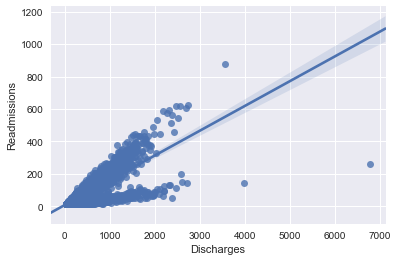

In [52]:
linear_fitting(df.copy(),'Discharges','Readmissions')

In [63]:
df['Readmission_over_Discharges']= df.Readmissions.values / df.Discharges.values

In [64]:
fig = usa_map_figure(df.groupby('State').max().reset_index(level=0, inplace=False),'Readmission_over_Discharges', 'Readmission_over_Discharges')
py.iplot( fig, filename='Maximum of Total readmissions over discharges' )

## Maximum of Excesss Ratio within each state

In [61]:
df_states = df_log10.groupby('State').max().reset_index(level=0, inplace=False)
df_states.head(1)
fig = usa_map_figure(df_states,'Excess_Ratio', 'Maximum Excess_Ratio')
py.iplot( fig, filename='Excess-Readmission-Ratio' )

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.978     
Dependent Variable: y                AIC:                -4913.1691
Date:               2017-03-20 16:01 BIC:                -4906.4798
No. Observations:   5939             Log-Likelihood:     2457.6    
Df Model:           1                F-statistic:        2.623e+05 
Df Residuals:       5938             Prob (F-statistic): 0.00      
R-squared:          0.978            Scale:              0.025596  
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1        0.4359      0.0009    512.2003    0.0000    0.4343    0.4376
-------------------------------------------------------------------
Omnibus:              30.472        Durbin-Watson:           1.756 
Prob(Omnibus):        0.000         Jarque-Bera (JB): 

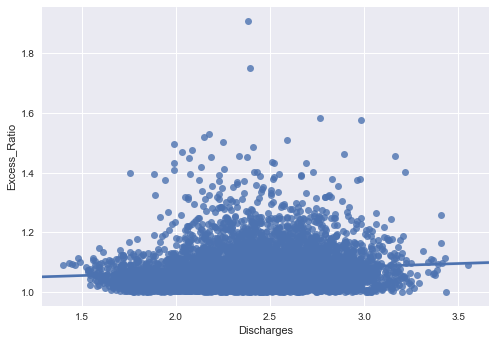

In [17]:
linear_fitting(df_log10[df_log10.Excess_Ratio>1.0],'Discharges','Excess_Ratio')

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.976     
Dependent Variable: y                AIC:                -5596.2362
Date:               2017-03-20 16:02 BIC:                -5589.6132
No. Observations:   5558             Log-Likelihood:     2799.1    
Df Model:           1                F-statistic:        2.236e+05 
Df Residuals:       5557             Prob (F-statistic): 0.00      
R-squared:          0.976            Scale:              0.021388  
----------------------------------------------------------------------
          Coef.     Std.Err.       t        P>|t|     [0.025    0.975]
----------------------------------------------------------------------
x1        0.3734      0.0008    472.8227    0.0000    0.3719    0.3750
-------------------------------------------------------------------
Omnibus:              147.930       Durbin-Watson:          1.202  
Prob(Omnibus):        0.000         Jarque-Bera (JB): 

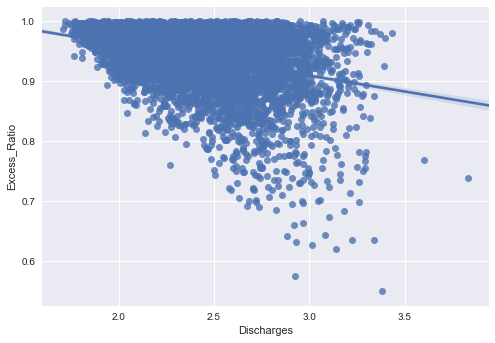

In [18]:
linear_fitting(df_log10[df_log10.Excess_Ratio<=1.0],'Discharges','Excess_Ratio')